In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import math

In [ ]:
# Funcion: plot_features_cat_regression

def plot_features_cat_regression2(
    df,
    target_col="",
    columns=[],
    pvalue=0.05,
    with_individual_plot=False
):
    """
    Representa gráficamente la relación entre variables categóricas y una variable
    objetivo numérica mediante histogramas agrupados, siempre que exista una relación
    estadísticamente significativa.

    Argumentos:
    df: DataFrame que contiene las variables a analizar.
    target_col (str): Nombre de la variable objetivo numérica. Por defecto "".
    columns (list[str]): Lista de variables categóricas a evaluar. Si está vacía,
                          se utilizarán automáticamente las variables categóricas
                          del DataFrame.
    pvalue (float): Nivel de significación estadística para el contraste de hipótesis.
                    Por defecto 0.05.
    with_individual_plot (bool): Si es True, genera un gráfico individual por cada
                                 variable significativa. Por defecto False.

    Retorna:
    list[str]: Lista de variables categóricas cuya relación con la variable objetivo
               es estadísticamente significativa según el nivel de significación
               indicado.
    """

    # ================== CHECKS ==================
    if target_col == "":
        print(" Debes indicar una columna target.")
        return []

    if target_col not in df.columns:
        print(f" La columna target '{target_col}' no existe en el DataFrame.")
        return []

    if not pd.api.types.is_numeric_dtype(df[target_col]):
        print(f" La columna target '{target_col}' debe ser numérica.")
        return []

    if not (0 < pvalue < 1):
        print(" El valor de pvalue debe estar entre 0 y 1.")
        return []

    # ================== SELECCIÓN DE COLUMNAS ==================
    if columns is None or len(columns) == 0:
        columns = df.select_dtypes(include=["object", "category"]).columns.tolist()
    else:
        columns = [col for col in columns if col in df.columns]

    if len(columns) == 0:
        print(" No hay variables categóricas válidas para analizar.")
        return []

    significant_cols = []

    # ================== TEST ESTADÍSTICO ==================
    for col in columns:
        grupos = [
            df.loc[df[col] == categoria, target_col].dropna()
            for categoria in df[col].dropna().unique()
        ]

        if len(grupos) < 2:
            continue

        if any(g.nunique() <= 1 for g in grupos):
            continue

        stat, p = f_oneway(*grupos)

        if p < pvalue:
            significant_cols.append((col, p))

            # === GRÁFICO INDIVIDUAL ===
            if with_individual_plot:
                sns.barplot(
                    data=df,
                    x=col,
                    y=target_col,
                    hue=col,
                    estimator="mean",
                    errorbar=None,
                    palette="tab10",
                    legend=False,
                )
                plt.ylim(0, 1)
                plt.ylabel("Survival rate")
                plt.title(f"{col} vs {target_col}")
                plt.tight_layout()
                plt.show()

    # ================== GRÁFICOS EN GRID (2 POR FILA) ==================
    if not with_individual_plot and significant_cols:
        n_cols = 2
        n_rows = math.ceil(len(significant_cols) / n_cols)

        fig, axes = plt.subplots(
            n_rows,
            n_cols,
            figsize=(16, 4 * n_rows),
            squeeze=False
        )

        # Convertir axes a lista 2D para recorrerlos fácilmente
        axes = [[ax for ax in row] for row in axes]

        for ax, (col, p) in zip([ax for row in axes for ax in row], significant_cols):
            sns.barplot(
                data=df,
                x=col,
                y=target_col,
                hue=col,
                estimator="mean",
                errorbar=None,
                palette="tab10",
                legend=False,
                ax=ax
            )
            ax.set_ylim(0, 1)
            ax.set_ylabel("Survival rate")
            ax.set_title(f"{col}")

        # Eliminar ejes sobrantes si hay número impar
        for ax in [ax for row in axes for ax in row][len(significant_cols):]:
            ax.remove()

        plt.tight_layout()
        plt.show()

    return [col for col, _ in significant_cols]


In [2]:
df=pd.read_csv("./data/titanic.csv")

In [ ]:
def plot_features_cat_regression2(
    df,
    target_col="",
    columns=[],
    pvalue=0.05,
    with_individual_plot=False
):
    """
    Representa gráficamente la relación entre variables categóricas y una variable
    objetivo numérica mediante histogramas agrupados, siempre que exista una relación
    estadísticamente significativa.

    Argumentos:
    df: DataFrame que contiene las variables a analizar.
    target_col (str): Nombre de la variable objetivo numérica. Por defecto "".
    columns (list[str]): Lista de variables categóricas a evaluar. Si está vacía,
                          se utilizarán automáticamente las variables categóricas
                          del DataFrame.
    pvalue (float): Nivel de significación estadística para el contraste de hipótesis.
                    Por defecto 0.05.
    with_individual_plot (bool): Si es True, genera un gráfico individual por cada
                                 variable significativa. Por defecto False.

    Retorna:
    list[str]: Lista de variables categóricas cuya relación con la variable objetivo
               es estadísticamente significativa según el nivel de significación
               indicado.
    """

    # ================== CHECKS ================== Verifica que la columna target exista, sea numérica y que el p-value sea válido.
    if target_col == "":
        print(" Debes indicar una columna target.")
        return []

    if target_col not in df.columns:
        print(f" La columna target '{target_col}' no existe en el DataFrame.")
        return []

    if not pd.api.types.is_numeric_dtype(df[target_col]):
        print(f" La columna target '{target_col}' debe ser numérica.")
        return []

    if not (0 < pvalue < 1):
        print(" El valor de pvalue debe estar entre 0 y 1.")
        return []

    # ================== SELECCIÓN DE COLUMNAS ================== Determina qué variables categóricas se van a analizar, usando todas si no se pasan como argumento.
    if columns is None or len(columns) == 0:
        columns = df.select_dtypes(include=["object", "category"]).columns.tolist()
    else:
        columns = [col for col in columns if col in df.columns]

    if len(columns) == 0:
        print(" No hay variables categóricas válidas para analizar.")
        return []

    significant_cols = []

    # ================== TEST ESTADÍSTICO ================== Aplica ANOVA a cada variable categórica para comprobar si hay relación significativa con la variable objetivo.
    for col in columns:
        grupos = [
            df.loc[df[col] == categoria, target_col].dropna()
            for categoria in df[col].dropna().unique()
        ]

        if len(grupos) < 2:
            continue

        if any(g.nunique() <= 1 for g in grupos):
            continue

        stat, p = f_oneway(*grupos)

        if p < pvalue:
            significant_cols.append((col, p))

            # === GRÁFICO INDIVIDUAL === Por defecto genera un gráfico de barras separado para cada variable categórica significativa.
            if with_individual_plot:
                sns.barplot(
                    data=df,
                    x=col,
                    y=target_col,
                    hue=col,
                    estimator="mean",
                    errorbar=None,
                    palette="tab10",
                    legend=False,
                )
                plt.ylim(0, 1)
                plt.ylabel("Survival rate")
                plt.title(f"{col} vs {target_col}")
                plt.tight_layout()
                plt.show()

    # ================== GRÁFICOS EN GRID (2 POR FILA) ================== Si no se generan gráficos individuales, organiza todas las variables significativas en un grid de 2 columnas y muestra sus medias.
    if not with_individual_plot and significant_cols:
        n_cols = 2
        n_rows = math.ceil(len(significant_cols) / n_cols)

        fig, axes = plt.subplots(
            n_rows,
            n_cols,
            figsize=(16, 4 * n_rows),
            squeeze=False
        )

        # Convertir axes a lista 2D para recorrerlos fácilmente
        axes = [[ax for ax in row] for row in axes]

        for ax, (col, p) in zip([ax for row in axes for ax in row], significant_cols):
            sns.barplot(
                data=df,
                x=col,
                y=target_col,
                hue=col,
                estimator="mean",
                errorbar=None,
                palette="tab10",
                legend=False,
                ax=ax
            )
            ax.set_ylim(0, 1)
            ax.set_ylabel("Survival rate")
            ax.set_title(f"{col}")

        # Eliminar ejes sobrantes si hay número impar
        for ax in [ax for row in axes for ax in row][len(significant_cols):]:
            ax.remove()

        plt.tight_layout()
        plt.show()

    return [col for col, _ in significant_cols]

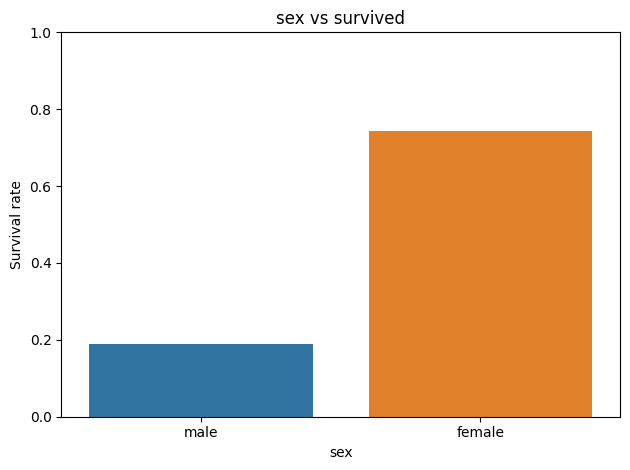

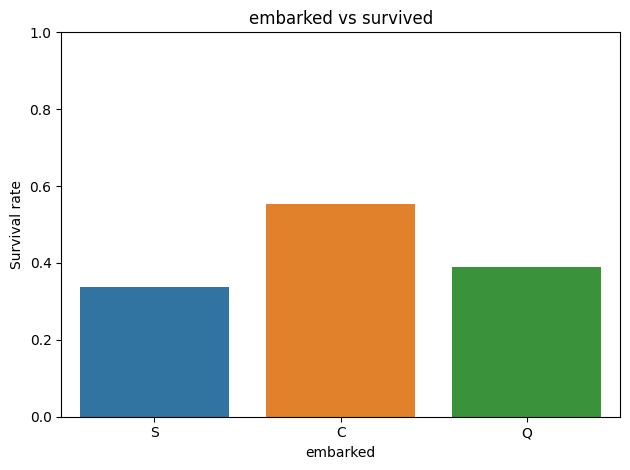

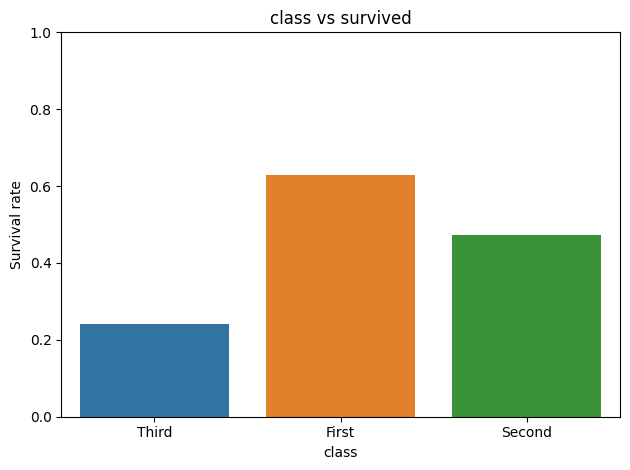

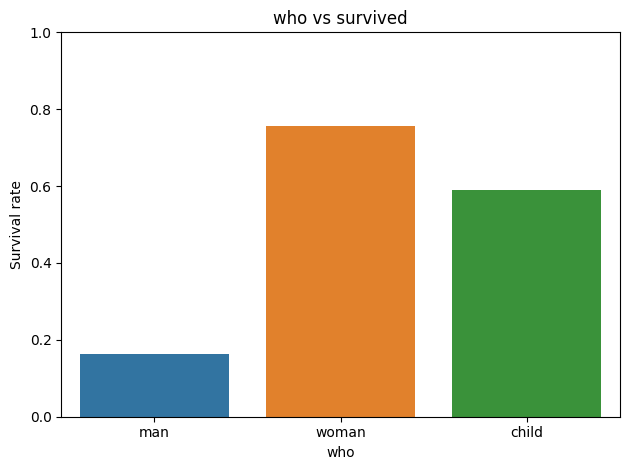

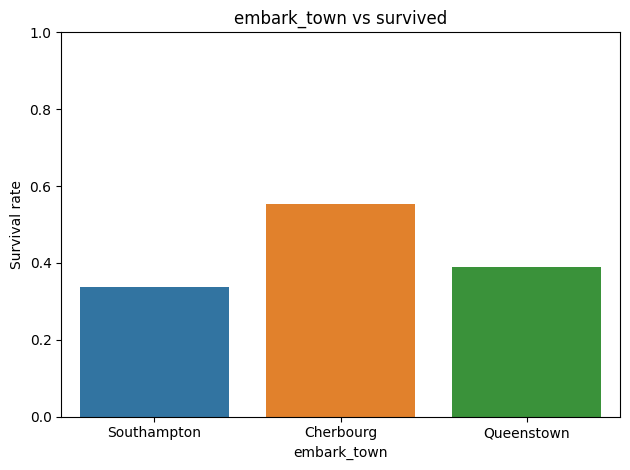

['sex', 'embarked', 'class', 'who', 'embark_town']

In [62]:
plot_features_cat_regression2(df,target_col="survived", with_individual_plot=True)